In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q '/content/drive/My Drive/Datasets/GWA-T-13_Materna-Workload-Traces.zip'

In [3]:
#import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn import metrics

# Read the data


In [4]:
#read the input data file
input_file = pd.read_csv('/content/GWA-T-13_Materna-Workload-Traces/Materna-Trace-1/01.csv', delimiter=';')
input_file.head()

,Timestamp,CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Disk size [GB],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,05.11.2015 00:00:00,2,0,156,"3,4",4194304,1050673,"25,05",0,14,54,12,45
1,05.11.2015 00:05:00,2,0,150,"3,27",4194304,1095552,"26,12",0,17,54,2,13
2,05.11.2015 00:10:00,2,0,158,"3,46",4194304,1025507,"24,45",0,15,54,12,45
3,05.11.2015 00:15:00,2,0,156,"3,4",4194304,992372,"23,66",0,16,54,3,12
4,05.11.2015 00:20:00,2,0,159,"3,47",4194304,1129107,"26,92",0,15,54,13,46


In [5]:
#number of rows and columns in data
input_file.shape

(8352, 13)

# Preprocessing of the data

In [6]:
#Remove timestamp column
input_file = input_file.drop('Timestamp', axis=1)
#replace , with . in percentage value
input_file = input_file.replace(to_replace=r',', value='.', regex=True)
#Take neccessary columns from data
machine_df = input_file[['CPU usage [%]','Memory usage [%]','Disk read throughput [KB/s]',
                        'Disk write throughput [KB/s]']]
#scale the data
machine_data_std = StandardScaler().fit_transform(machine_df)

# Evaluation metrics
*   The Silhouette score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
*   Calinski-Harabasz index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters , where a higher score relates to better defined clusters.
 
*   Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. Zero is the lowest possible score. Values closer to zero indicate a better partition.


*   Bayesian information criterion(BIC) and Akaike information criterion(AIC)  is used to eveluate Gaussian mixture model, lower the BIC and AIC values indicate better model.




# Affinity Propogation


*   Affinity Propagation creates clusters by sending messages between data points until convergence.
*  The damping factor which damps the responsibility and availability of messages to avoid numerical oscillations when updating these messages.












In [24]:
#define funaction for Affinity Propogation clustering
def affinityPropogation(damping, data):
  model = AffinityPropagation(damping)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each clusterfor cluster in clusters:
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    plt.title("Damping="+str(damping))
  # show the plot
  plt.show()
   #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

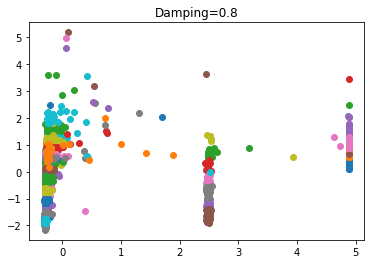

Silhouette score : 0.38285609136636795
Calinski Harabasz score : 77838.22986685798
Davies Bouldin score score : 0.5042656606660789


In [25]:
#call the above defined function
affinityPropogation(damping=0.8, data=machine_data_std)

# Agglomerative Clustering

Agglomerative clustering is a hierarchical clustering - Bottom up approach. The idea is start with many small clusters and merge them together to create bigger clusters.

In [22]:
#define funaction for Agglomerative Clustering
def agglomerativeClustering(n_clusters, data):
  # define the model
  model = AgglomerativeClustering(n_clusters=3)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    plt.title("number of clusters = "+str(n_clusters))
  # show the plot
  plt.show()
  #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

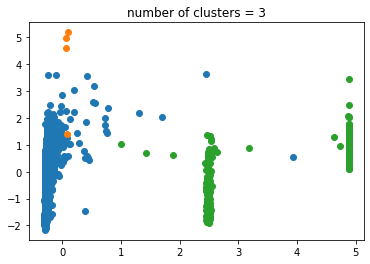

Silhouette score : 0.7125916518585155
Calinski Harabasz score : 3559.521098473882
Davies Bouldin score score : 0.516617705770042


In [40]:
#call the above defined function
agglomerativeClustering(n_clusters=3, data=machine_data_std)

# Birch Clustering

Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset.

In [20]:
#define funaction for Birch Clustering
def birch(threshold, n_clusters, data):
# define the model
  model = Birch(threshold, n_clusters)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("Thresold="+str(threshold)+"    "+"number of clusters = "+str(n_clusters))
  # show the plot
  plt.show()
  #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

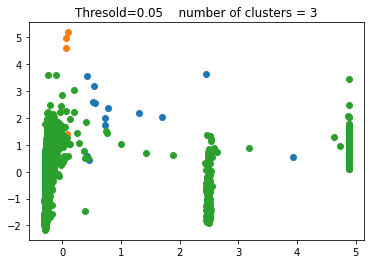

Silhouette score : 0.916044501391224
Calinski Harabasz score : 3028.7406734539254
Davies Bouldin score score : 0.5187500109656495


In [41]:
#call the above defined function
birch(threshold=0.05, n_clusters=3, data=machine_data_std)

# KMeans Clustering


KMeans partition observations into k clusters in which each observation belongs to the cluster with the nearest mean.

In [18]:
#define funaction for KMeans Clustering
def kMeans(n_clusters, data):
  # define the model
  model = KMeans(n_clusters)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("number of clusters = "+str(n_clusters))
  
  # show the plot
  plt.show()
  #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

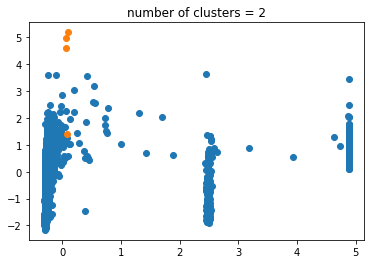

Silhouette score : 0.9652441188331299
Calinski Harabasz score : 2567.794437672516
Davies Bouldin score score : 0.24167344831688053


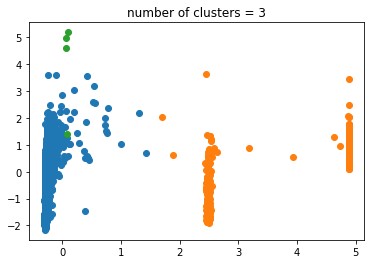

Silhouette score : 0.7196674389490016
Calinski Harabasz score : 3573.4514422832267
Davies Bouldin score score : 0.5379418767442461


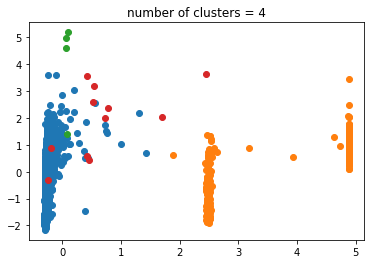

Silhouette score : 0.7224179201411325
Calinski Harabasz score : 5639.671696338704
Davies Bouldin score score : 0.4924038570081


In [19]:
#call the above defined funaction
kMeans(n_clusters=2, data=machine_data_std)
kMeans(n_clusters=3, data=machine_data_std)
kMeans(n_clusters=4, data=machine_data_std)

# Mini Batch KMeans Clustering

Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. 

In [26]:
# define function for mini-batch k-means clustering
def miniBatchKMeansClustering(n_clusters, data):
  # define the model
  model = MiniBatchKMeans(n_clusters)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("number of clusters = "+str(n_clusters))
  # show the plot
  plt.show()
   #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

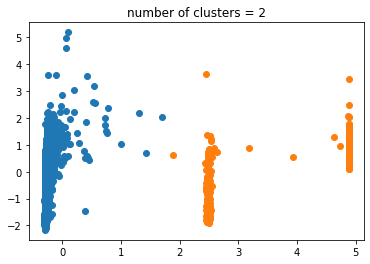

Silhouette score : 0.7126276885967578
Calinski Harabasz score : 2437.924889503553
Davies Bouldin score score : 0.6744125418209915


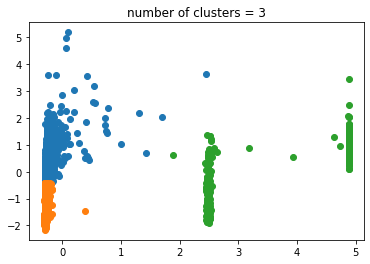

Silhouette score : 0.7084706102115516
Calinski Harabasz score : 2979.817915845163
Davies Bouldin score score : 0.5124796096102338


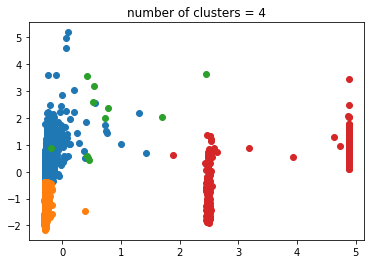

Silhouette score : 0.7230528777903944
Calinski Harabasz score : 4561.823294550513
Davies Bouldin score score : 0.4588883875378357


In [27]:
#call the above defined function
miniBatchKMeansClustering(n_clusters=2, data=machine_data_std)
miniBatchKMeansClustering(n_clusters=3, data=machine_data_std)
miniBatchKMeansClustering(n_clusters=4, data=machine_data_std)

# Mean Shift Clustering

The idea is  for given a set of data points, the algorithm iteratively assigns each data point towards the closest cluster centroid and direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.

In [28]:
#define function for MeanShift clustering
def meanShift(data):
  # define the model
  model = MeanShift()
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
  # show the plot
  plt.show()
   #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

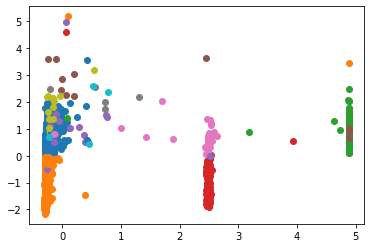

Silhouette score : 0.6635561965619602
Calinski Harabasz score : 5997.701787470773
Davies Bouldin score score : 0.33772009856704843


In [29]:
#call the above defined funnction
meanShift(data=machine_data_std)

# OPTICS Clustering

Ordering Points to Identify Cluster Structure(OPTICS), relative of DBSCAN, will create a reachability plot that is then used to extract clusters. 

In [30]:
#define function for OPTICS clustering
def OPTICSClustering(eps, min_samples, data):
  # define the model
  model = OPTICS(eps, min_samples)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("eps="+str(eps)+"    "+"min_samples = "+str(min_samples))
  # show the plot
  plt.show()
   #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

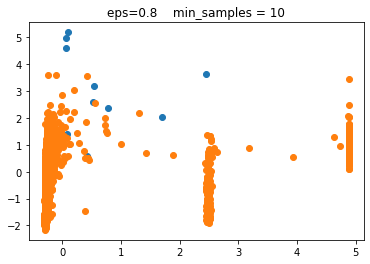

Silhouette score : 0.956430004257503
Calinski Harabasz score : 2245.5393448316527
Davies Bouldin score score : 1.030225528805574


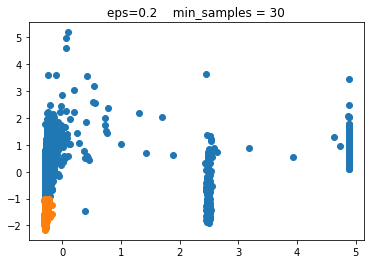

Silhouette score : 0.5273656586287356
Calinski Harabasz score : 1728.700138357725
Davies Bouldin score score : 0.564833278468325


In [31]:
#call the above defined function
OPTICSClustering(eps=0.8, min_samples=10, data=machine_data_std)
OPTICSClustering(eps=0.2, min_samples=30, data=machine_data_std)

# Gaussian Mixture Clustering

Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters.

In [38]:
# define function for gaussian mixture clustering
def gaussianMixtureClustering(n_components, data):
  # define the model
  model = GaussianMixture(n_components)
  # fit the model
  model.fit(data)
  # assign a cluster to each example
  yhat = model.predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    #add title for a plot 
    plt.title("Number of components"+str(n_components))
  # show the plot
  plt.show()
   #evaluate model
  print("Bayesian information criterion : "+ str(model.bic(data)))
  print("Akaike information criterion : "+ str(model.aic(data)))
  
  

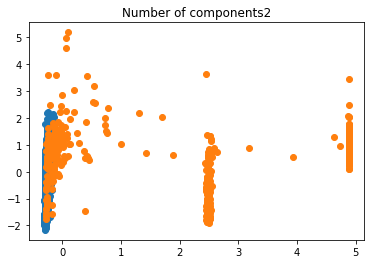

Bayesian information criterion : -123700.04949711061
Akaike information criterion : -123903.92693010416


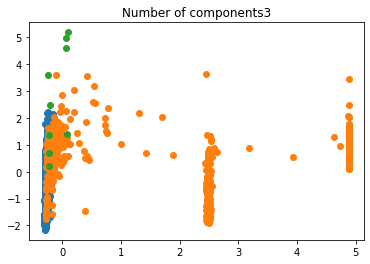

Bayesian information criterion : -128983.61255483644
Akaike information criterion : -129292.94383248182


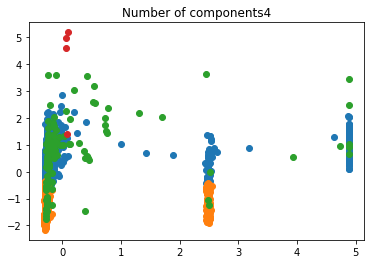

Bayesian information criterion : -87463.41647783748
Akaike information criterion : -87878.20160013471


In [39]:
#call the above defined function
gaussianMixtureClustering(n_components=2, data=machine_data_std)
gaussianMixtureClustering(n_components=3, data=machine_data_std)
gaussianMixtureClustering(n_components=4, data=machine_data_std)

# DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN)'s key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

In [34]:
# define function for dbscan clustering
def dbscan(eps, min_samples, data):
  # define the model
  model = DBSCAN(eps, min_samples)
  # fit model and predict clusters
  yhat = model.fit_predict(data)
  # retrieve unique clusters
  clusters = unique(yhat)
  # create scatter plot for samples from each cluster
  for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data[row_ix, 0], data[row_ix, 1])
    plt.title("eps="+str(eps)+"    "+"min_samples="+str(min_samples))
  # show the plot
  plt.show()
   #evaluate model
  labels = model.labels_
  print("Silhouette score : "+ str(metrics.silhouette_score(data, labels, metric='euclidean')))
  print("Calinski Harabasz score : "+ str(metrics.calinski_harabasz_score(data, labels)))
  print("Davies Bouldin score score : "+ str(metrics.davies_bouldin_score(data, labels)))

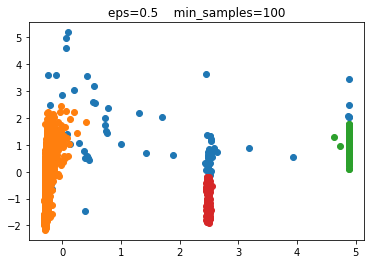

Silhouette score : 0.6485731215623279
Calinski Harabasz score : 1280.689225553054
Davies Bouldin score score : 1.672588609408209


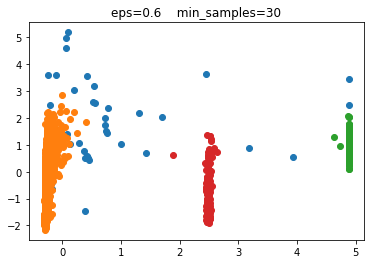

Silhouette score : 0.6536225925364922
Calinski Harabasz score : 1599.9142599098532
Davies Bouldin score score : 1.4297008227516101


In [35]:
#call the above defined funtion
dbscan(eps=0.5, min_samples=100, data=machine_data_std)
dbscan(eps=0.6, min_samples=30, data=machine_data_std)